<a href="https://colab.research.google.com/github/aya-mj/Supervised-Learning-Classification/blob/main/Supervised_Learning_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Checkpoints/ML/Projects/African_crises_dataset.csv')

print(data.head())
print(data.info())
print(data.describe())



   country_number country_code  country  year  systemic_crisis  exch_usd  \
0               1          DZA  Algeria  1870                1  0.052264   
1               1          DZA  Algeria  1871                0  0.052798   
2               1          DZA  Algeria  1872                0  0.052274   
3               1          DZA  Algeria  1873                0  0.051680   
4               1          DZA  Algeria  1874                0  0.051308   

   domestic_debt_in_default  sovereign_external_debt_default  \
0                         0                                0   
1                         0                                0   
2                         0                                0   
3                         0                                0   
4                         0                                0   

   gdp_weighted_default  inflation_annual_cpi  independence  currency_crises  \
0                   0.0              3.441456             0                0  

ERROR: Operation cancelled by user


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: 

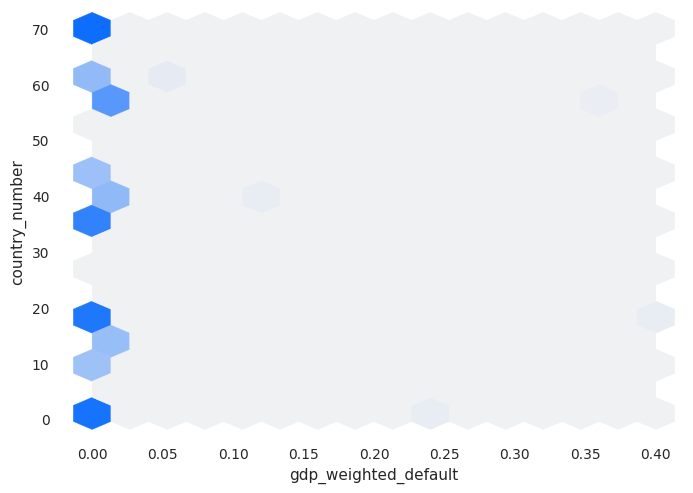

In [4]:
##report
!pip install ydata_profiling


from ydata_profiling import ProfileReport
profile = ProfileReport(data, title="Pandas Profiling Report")
profile.to_file("output_report.html")


In [10]:
# Import required libraries
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
####removing the missing values

missing_values = data.isnull().sum()
print(missing_values)
#as we can see no missing values in the report
###duplicate values

duplicate_values = data.duplicated().sum()
print(duplicate_values)
#data.drop_duplicates()


country_number                     0
country_code                       0
country                            0
year                               0
systemic_crisis                    0
exch_usd                           0
domestic_debt_in_default           0
sovereign_external_debt_default    0
gdp_weighted_default               0
inflation_annual_cpi               0
independence                       0
currency_crises                    0
inflation_crises                   0
banking_crisis                     0
dtype: int64
0


In [23]:
##detect the outliers
def Detect_Outliers(data, column):
  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
  return outliers

outliers = Detect_Outliers(data, 'inflation_annual_cpi')
print(len(outliers))

def Remove_Outliers(data, column):
  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
  return data

data = Remove_Outliers(data, 'inflation_annual_cpi')
print(len(data))



108
951


In [25]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
data['inflation_annual_cpi'] = scaler.fit_transform(data[['inflation_annual_cpi']])

#########detect the numerical colums
var_numerics = data.select_dtypes(include=['float64', 'int64'])
numeric_colums = var_numerics.columns
data[numeric_colums] = scaler.fit_transform(data[numeric_colums])

#######remove the outliers from the numerical colums

##########categorical columns
var_categorical = data.select_dtypes(include=['object'])
categorical_columns = var_categorical.columns
data = pd.get_dummies(data, columns=categorical_columns)

####encode
#data = pd.get_dummies(data, columns=['banking_crisis'])

encoder = LabelEncoder()
for col in data.columns:
    data[col] = encoder.fit_transform(data[col])

print(data.head())


   country_number  year  systemic_crisis  exch_usd  domestic_debt_in_default  \
0               0    10                1        61                         0   
1               0    11                0        64                         0   
2               0    12                0        62                         0   
3               0    13                0        56                         0   
4               0    14                0        55                         0   

   sovereign_external_debt_default  gdp_weighted_default  \
0                                0                     0   
1                                0                     0   
2                                0                     0   
3                                0                     0   
4                                0                     0   

   inflation_annual_cpi  independence  currency_crises  ...  country_Kenya  \
0                   339             0                0  ...              0   
1 

In [29]:
target = 'systemic_crisis'
features = [col for col in data.columns if col != target and col != 'country' and col != 'country_code']

X = data[features]
y = data[target]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [32]:
##########randomforest classification
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators=100, random_state=42)
RF_model.fit(X_train, y_train)

y_pred = RF_model.predict(X_test)
Accuracy = RF_model.score(X_test, y_test)
print(Accuracy)

0.9895104895104895


In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       268
           1       0.94      0.89      0.91        18

    accuracy                           0.99       286
   macro avg       0.97      0.94      0.95       286
weighted avg       0.99      0.99      0.99       286

